In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans

data_folder_path = 'data/mobility_4_test'
csv_files = [f for f in os.listdir(data_folder_path) if f.endswith('.csv')]

all_data = pd.DataFrame()
for csv_file in csv_files:
    file_path = os.path.join(data_folder_path, csv_file)
    temp_data = pd.read_csv(file_path)
    temp_data['file'] = csv_file
    all_data = pd.concat([all_data, temp_data], ignore_index=True)

all_data.head()


,Unnamed: 0,index,Baseline: People Moving,Crisis: People Moving,x0,y0,x1,y1,file
0,0,7515,14.000000,30,62.788086,8.425543,62.963867,8.425543,day1_0000.csv
1,1,7517,11.000000,24,62.788086,8.425543,63.227540,8.256863,day1_0000.csv
2,2,7519,16.666667,45,62.788086,8.425543,63.315430,8.172468,day1_0000.csv
3,3,7520,14.000000,31,62.788086,8.425543,63.491210,8.425543,day1_0000.csv
4,4,7542,13.000000,38,62.788086,9.350634,63.139650,9.350634,day1_0000.csv


In [6]:
all_data_cleaned = all_data.drop(columns=['Unnamed: 0'])
all_data_cleaned['Mobility Reduction'] = all_data_cleaned['Baseline: People Moving'] - all_data_cleaned['Crisis: People Moving']
all_data_cleaned['Day'] = all_data_cleaned['file'].apply(lambda x: int(x.split('_')[0][3:]))
all_data_cleaned['Time Period'] = all_data_cleaned['file'].apply(lambda x: x.split('_')[1].split('.')[0])

missing_values = all_data_cleaned.isnull().sum()
missing_values


index                      0
Baseline: People Moving    0
Crisis: People Moving      0
x0                         0
y0                         0
x1                         0
y1                         0
file                       0
Mobility Reduction         0
Day                        0
Time Period                0
dtype: int64

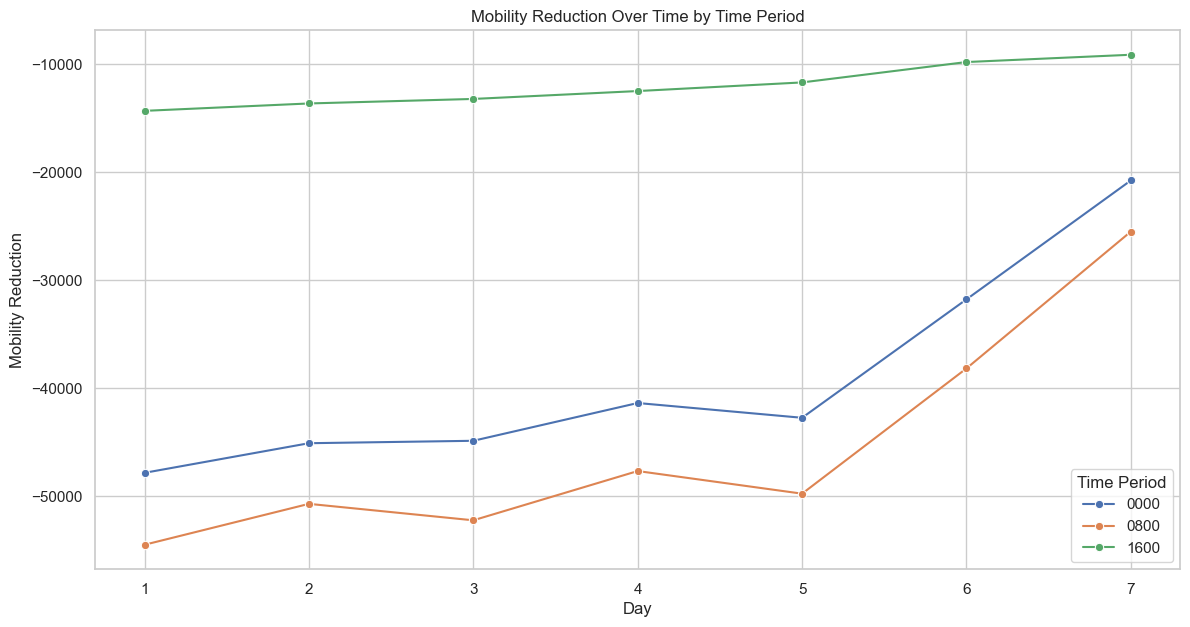

In [7]:
aggregated_data = all_data_cleaned.groupby(['Day', 'Time Period'])['Mobility Reduction'].sum().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
sns.lineplot(data=aggregated_data, x='Day', y='Mobility Reduction', hue='Time Period', marker='o')
plt.title('Mobility Reduction Over Time by Time Period')
plt.xlabel('Day')
plt.ylabel('Mobility Reduction')
plt.legend(title='Time Period')
plt.xticks(range(1, 8))
plt.show()


C:\Users\Aibat Abdizhalel\AppData\Local\Temp\ipykernel_4684\2687032562.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


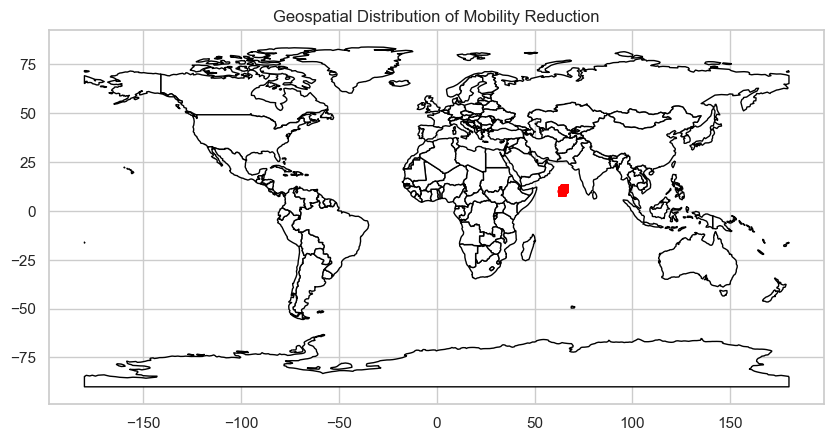

In [8]:
geometry = [Point(xy) for xy in zip(all_data_cleaned['x0'], all_data_cleaned['y0'])]
geo_data = gpd.GeoDataFrame(all_data_cleaned, geometry=geometry)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(ax=ax, color='white', edgecolor='black')
geo_data.plot(ax=base, marker='o', color='red', markersize=5, alpha=0.5)
plt.title('Geospatial Distribution of Mobility Reduction')
plt.show()


C:\Users\Aibat Abdizhalel\AppData\Local\Temp\ipykernel_4684\1303871599.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_reduction, x='Day', y='Mobility Reduction', palette='viridis')


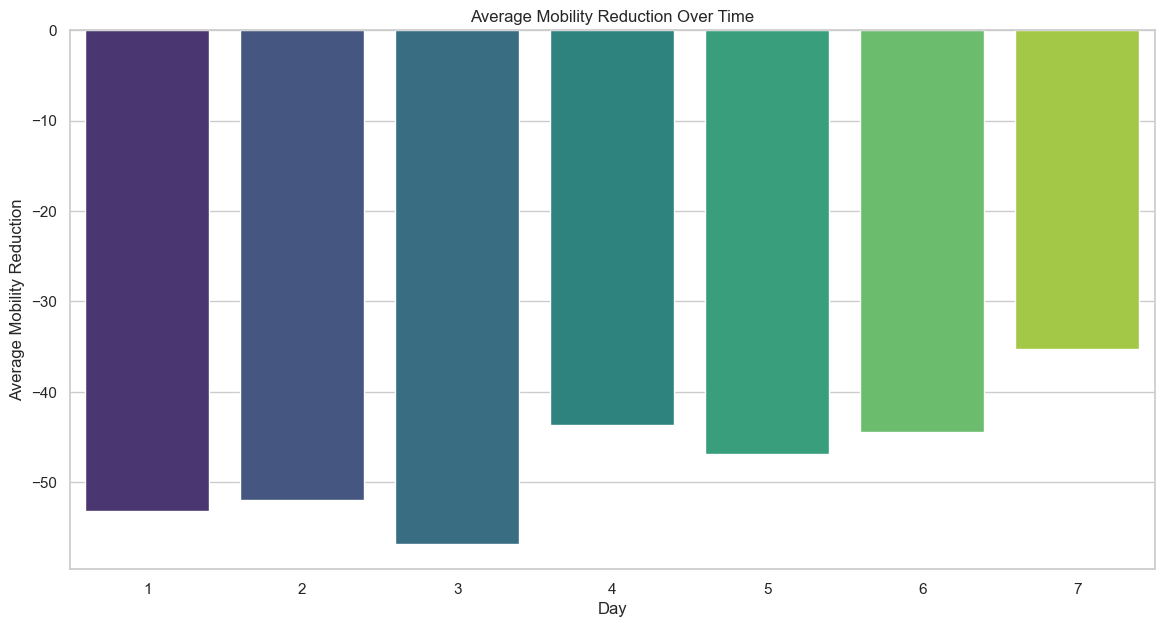

In [10]:
average_reduction = all_data_cleaned.groupby(['Day'])['Mobility Reduction'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=average_reduction, x='Day', y='Mobility Reduction', palette='viridis')
plt.title('Average Mobility Reduction Over Time')
plt.xlabel('Day')
plt.ylabel('Average Mobility Reduction')
plt.show()


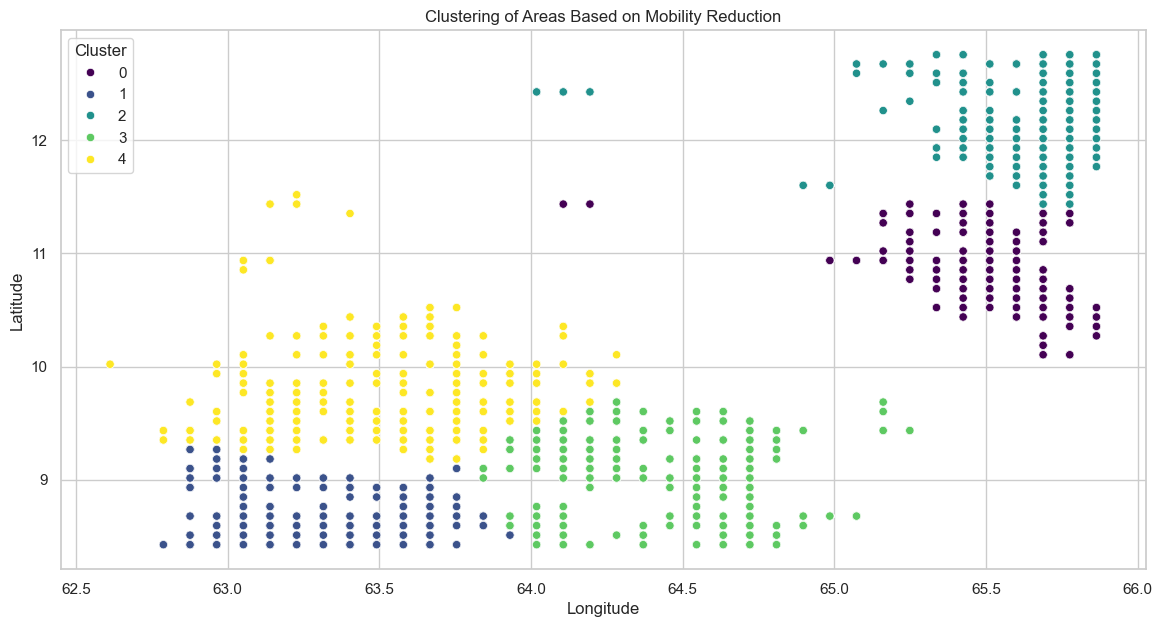

In [9]:
cluster_data = all_data_cleaned[['x0', 'y0', 'Mobility Reduction']].copy()
kmeans = KMeans(n_clusters=5, random_state=0).fit(cluster_data[['x0', 'y0']])
cluster_data['Cluster'] = kmeans.labels_

plt.figure(figsize=(14, 7))
sns.scatterplot(data=cluster_data, x='x0', y='y0', hue='Cluster', palette='viridis')
plt.title('Clustering of Areas Based on Mobility Reduction')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()


C:\Users\Aibat Abdizhalel\AppData\Local\Temp\ipykernel_4684\1310837683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_period_aggregation, x='Time Period', y='Mobility Reduction', palette='viridis')


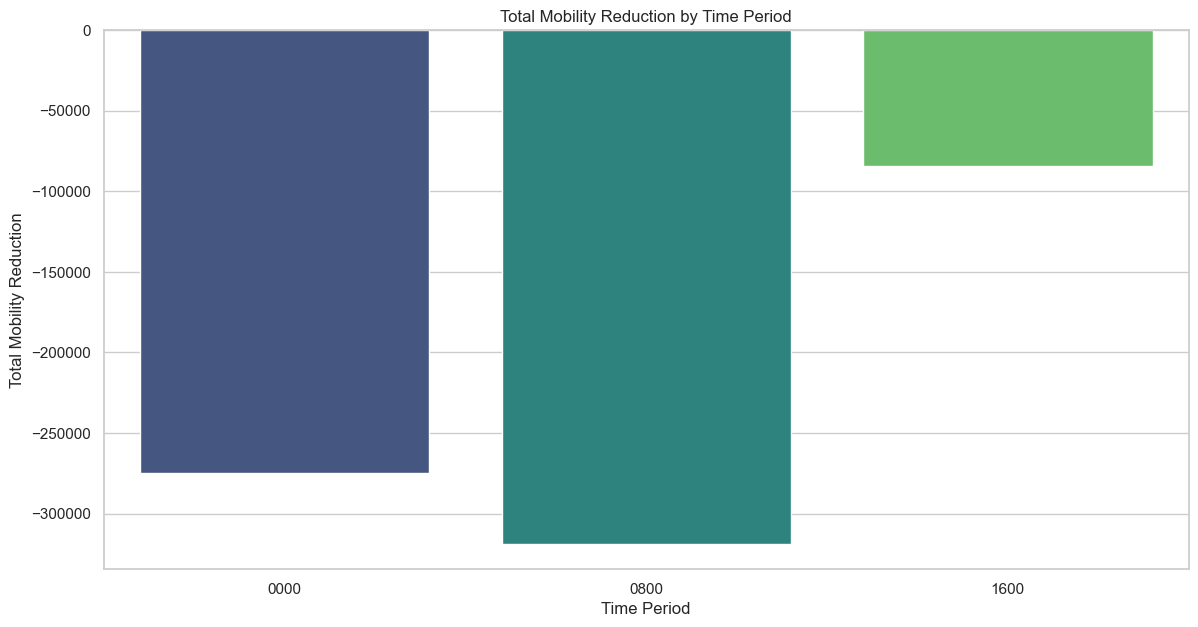

In [11]:
time_period_aggregation = all_data_cleaned.groupby(['Time Period'])['Mobility Reduction'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=time_period_aggregation, x='Time Period', y='Mobility Reduction', palette='viridis')
plt.title('Total Mobility Reduction by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Total Mobility Reduction')
plt.show()


### Mobility Reduction Trends Analysis

1. **Total Mobility Reduction Over Time**:
   - The line plot shows the total mobility reduction over time for each time period (0000, 0800, 1600).
   - It indicates how mobility reduction varies significantly throughout the week and different times of the day.

2. **Average Mobility Reduction Over Time**:
   - The bar plot displays the average mobility reduction per day.
   - This helps in understanding the general trend of mobility reduction on a daily basis.

3. **Total Mobility Reduction by Time Period**:
   - The bar plot shows the total mobility reduction for each time period aggregated across all days.
   - This highlights which time periods experience the most significant mobility reduction.

### Conclusion
The analysis of mobility reduction trends provides insights into how mobility changes over time and during different periods of the day. The findings can help policymakers understand the effectiveness of social distancing measures and identify periods or days where additional interventions may be necessary.
